# Descarga y carga del dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dimensiones, estadísticas y tipos

In [3]:
# Número de muestras y variables
print("Número de muestras:", df.shape[0])
print("Número de variables:", df.shape[1])

# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(df.isnull().sum())

# Tipos de datos de cada variable
print("\nTipos de datos por columna:")
print(df.dtypes)

Número de muestras: 7043
Número de variables: 21

Datos faltantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tipos de datos por columna:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      obje

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Mostrar estadísticas descriptivas para las variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
display(df[numeric_cols].describe())

Estadísticas descriptivas de variables numéricas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Variable objetivo

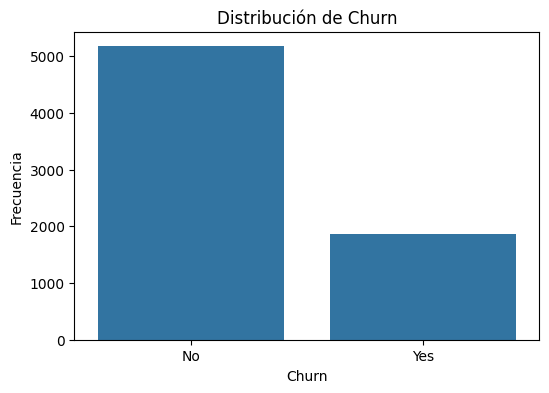

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de conteo para la variable Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
ratio = (df['Churn'] == 'No').sum() / (df['Churn'] == 'Yes').sum()
ratio

np.float64(2.7683253076511503)

# Variables categoricas

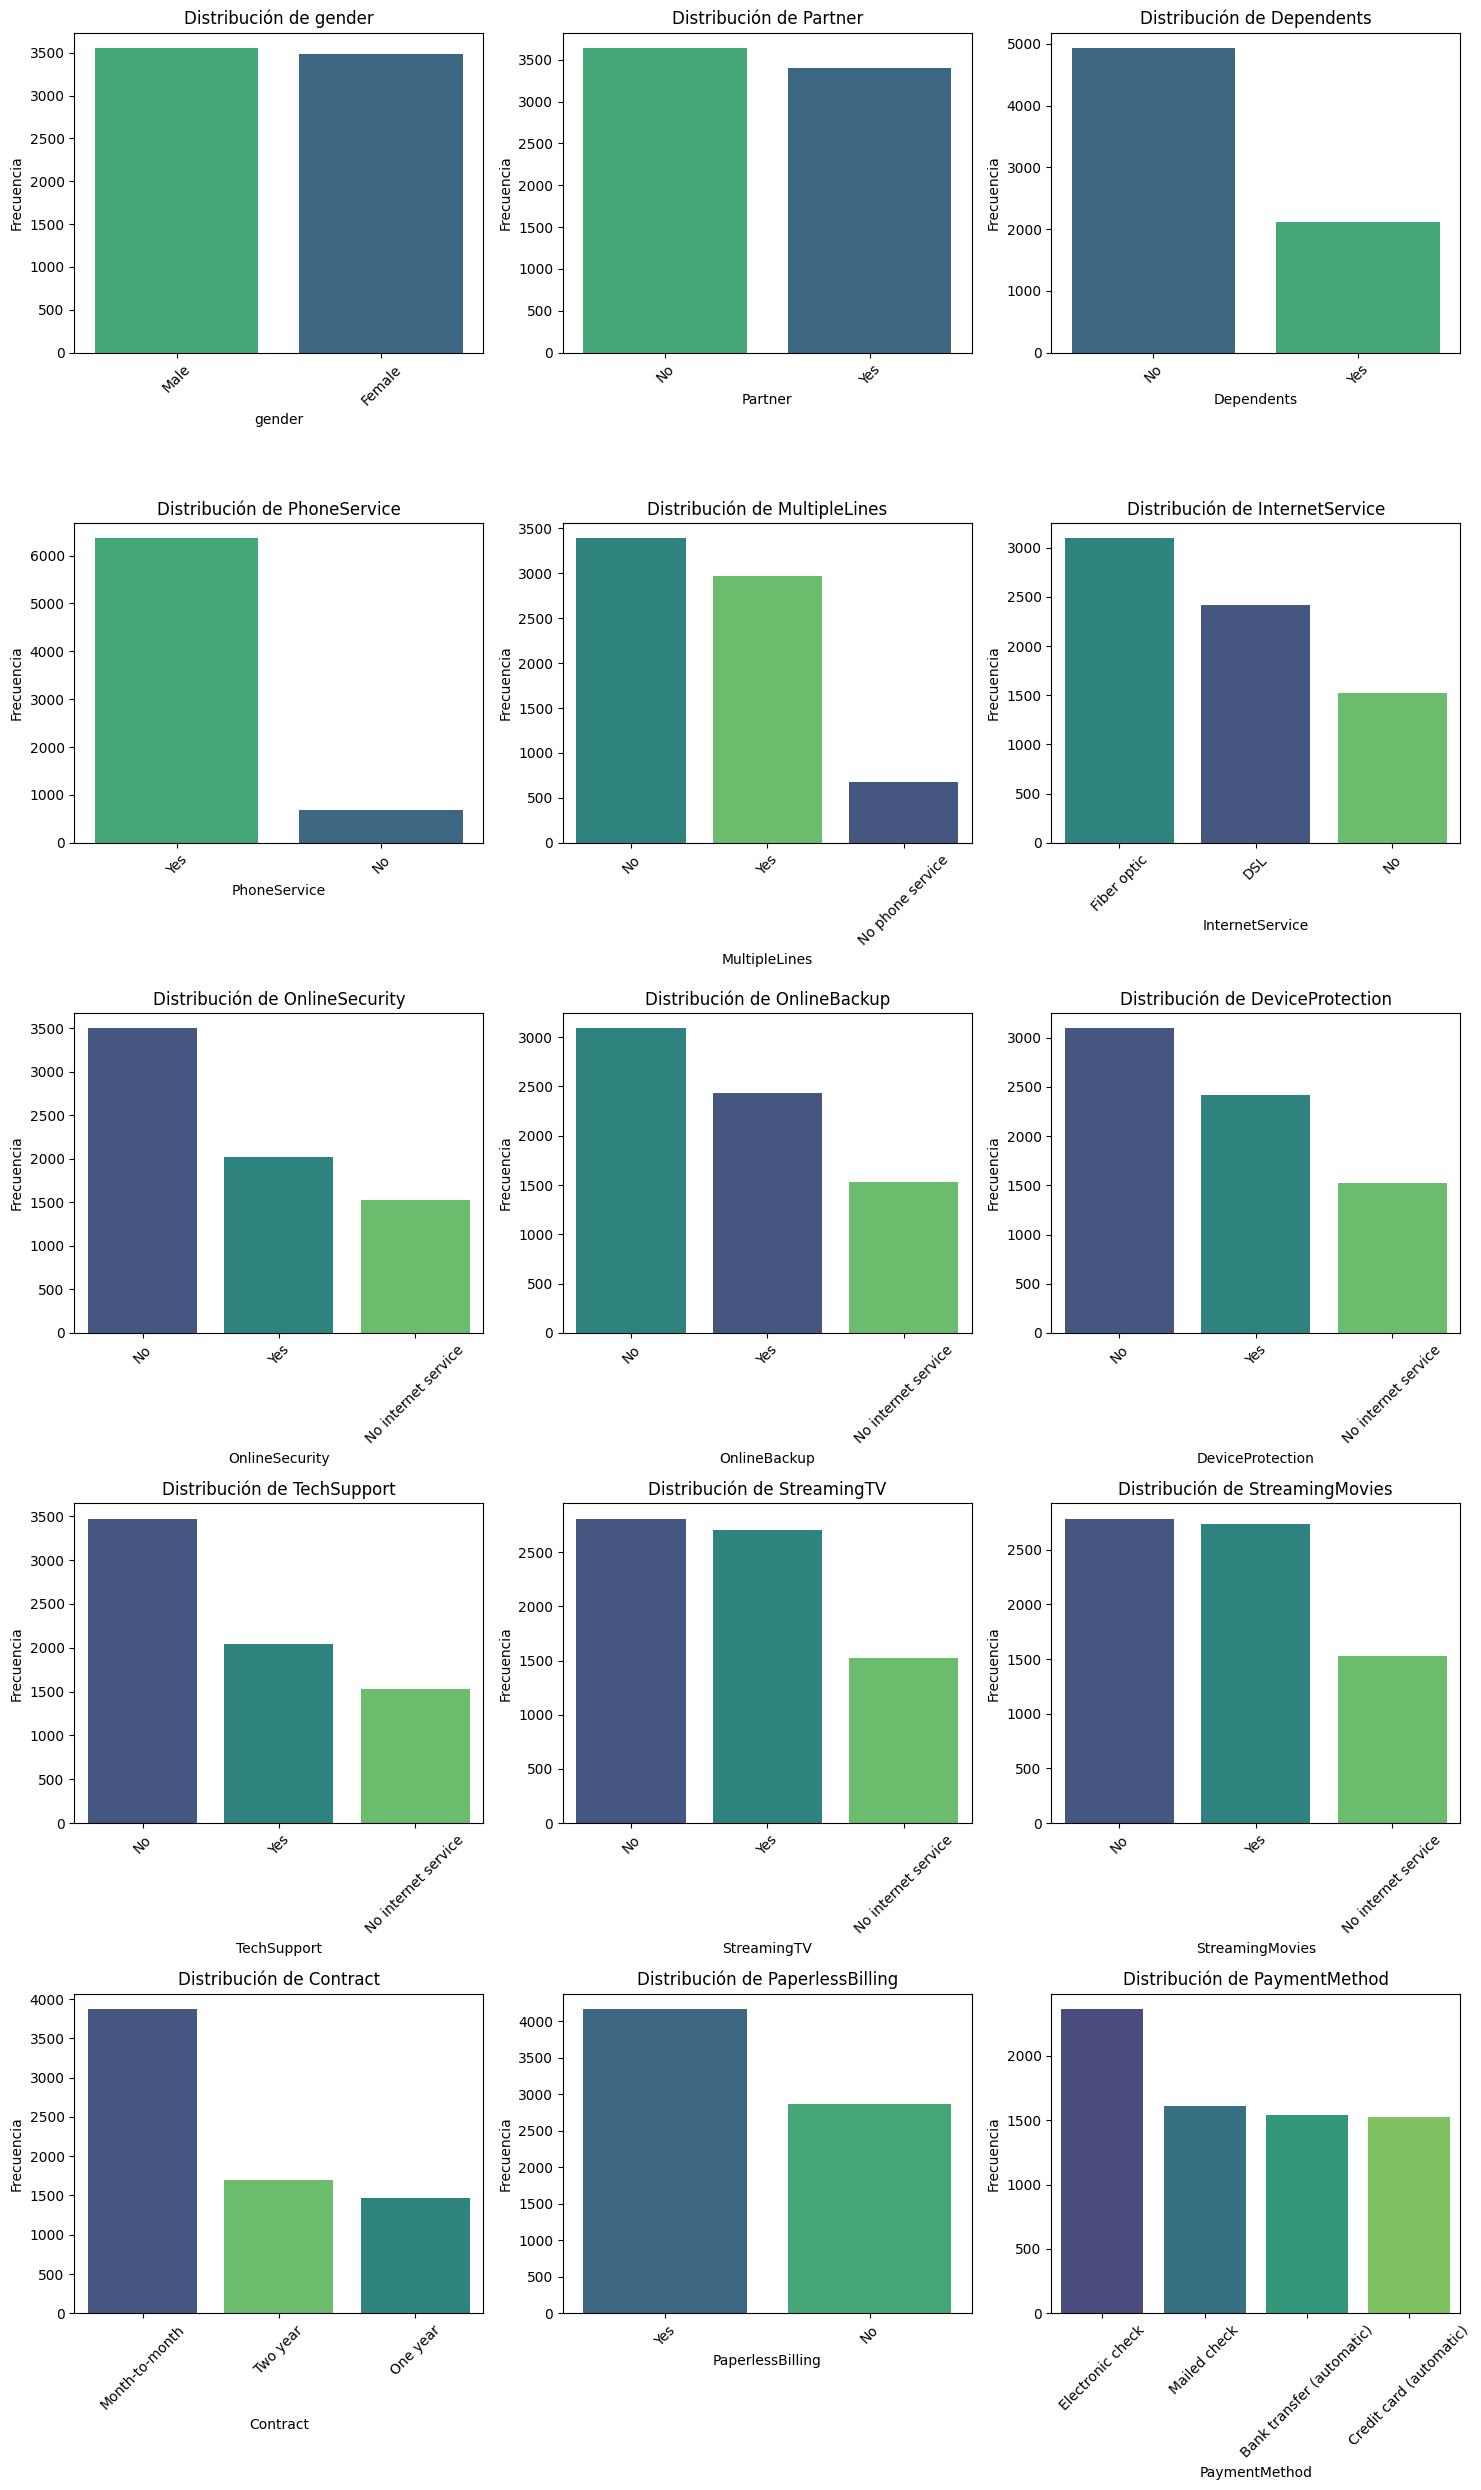

In [8]:
# Código de la celda 79b651a6
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seleccionar columnas categóricas (excluyendo customerID si no es relevante para la distribución)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID') # customerID is likely just an identifier
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # Churn is the target variable, will be visualized separately
if 'TotalCharges' in categorical_cols: # Exclude TotalCharges as it was converted to numeric
    categorical_cols.remove('TotalCharges')


# Calcular el número de filas y columnas para la cuadrícula
n_cols = 3  # Puedes ajustar el número de columnas según prefieras
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Crear gráficos de barras para las columnas categóricas en la cuadrícula
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', ax=axes[i], hue=col, legend=False) # Addressed FutureWarning
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45, labelrotation=45) # Corrected keyword to labelrotation


# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Columna 'TotalCharges'

Esta columna se trata de manera especial ya que la mayoría de sus datos son numericos, solo hay uno el cual es un string vacío

In [9]:
# Buscar valores no numericos en "TotalCharges"
non_numeric_totalcharges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges'].unique()

print("Non-numeric values in 'TotalCharges':", non_numeric_totalcharges)

Non-numeric values in 'TotalCharges': [' ']


In [10]:
# Comprobar si las demás columnas tienen al menos un valor convertible a numerico,
# y si es el caso buscar los valores únicos no numéricos
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if pd.to_numeric(df[col], errors='coerce').notna().any():
        print(f"La columna '{col}' tiene valores numericos y sus no numericos son:")
        print(df[pd.to_numeric(df[col], errors='coerce').isna()][col].unique())

La columna 'TotalCharges' tiene valores numericos y sus no numericos son:
[' ']


In [11]:
# Filas con la columna "TotalCharges" vacía
df[df["TotalCharges"] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Exploring how to compute TotalCharges

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.loc[2]

,2
customerID,3668-QPYBK
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,2
PhoneService,Yes
MultipleLines,No
InternetService,DSL
OnlineSecurity,Yes


In [14]:
import numpy as np
n = 1000
df_cols = df.loc[:n, ["tenure", "MonthlyCharges", "TotalCharges"]]

# to numeric
df_cols["TotalCharges"] = pd.to_numeric(df_cols["TotalCharges"], errors="coerce")

computed_total = df.loc[:n, "tenure"] * df.loc[:n, "MonthlyCharges"]
df_cols.loc[:, "TotalChargesComputed"] = computed_total
df_cols.loc[:, "LE"] = np.where(df_cols["TotalChargesComputed"] <= df_cols["TotalCharges"], "True", "False")

df_cols["err"] = (df_cols["TotalCharges"] - df_cols["TotalChargesComputed"])**2
df_cols.head()

,tenure,MonthlyCharges,TotalCharges,TotalChargesComputed,LE,err
0,1,29.85,29.85,29.85,True,0.0000
1,34,56.95,1889.50,1936.30,False,2190.2400
2,2,53.85,108.15,107.70,True,0.2025
3,45,42.30,1840.75,1903.50,False,3937.5625
4,2,70.70,151.65,141.40,True,105.0625


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


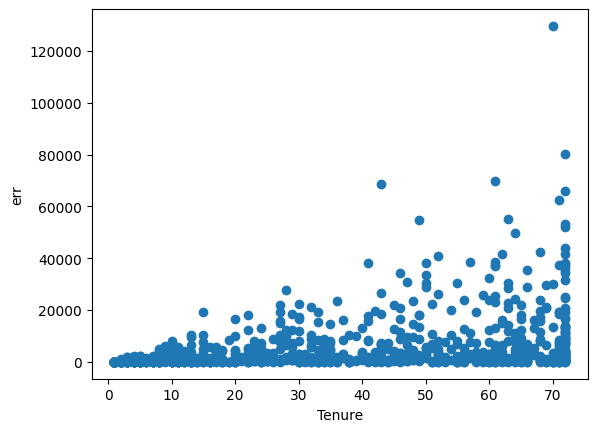

In [16]:
plt.plot(df_cols["tenure"], df_cols["err"], 'o')
plt.xlabel("Tenure")
plt.ylabel("err")
plt.show()

In [17]:
nan_rows = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
nan_rows[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]
# nan_rows.loc[488]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,,No
753,0,20.25,,No
936,0,80.85,,No
1082,0,25.75,,No
1340,0,56.05,,No
3331,0,19.85,,No
3826,0,25.35,,No
4380,0,20.00,,No
5218,0,19.70,,No
6670,0,73.35,,No


# Variables numericas

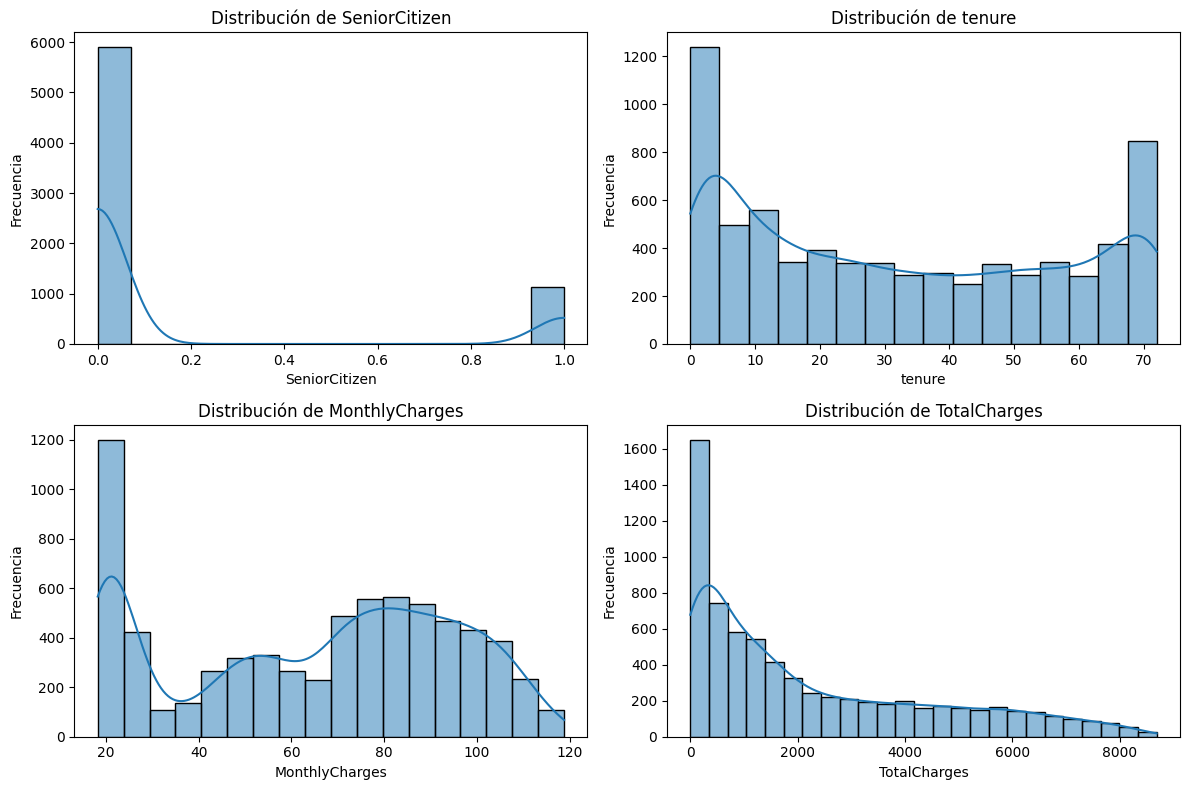

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_rows = df['TotalCharges'].isna()
df.loc[nan_rows, 'TotalCharges'] = np.fmin(1, df.loc[nan_rows, 'tenure']) * df.loc[nan_rows, 'MonthlyCharges']

# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el número de filas y columnas para la cuadrícula
n_cols = 2  # Puedes ajustar el número de columnas según prefieras
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Crear histogramas para las columnas numéricas en la cuadrícula
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
numeric_cols = numeric_cols.drop("SeniorCitizen")
numeric_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop 'customerID' as it's an identifier
df_temp = df.drop('customerID', axis=1)

# Encode target 'Churn' as 0/1
le = LabelEncoder()
y = pd.Series(
    le.fit_transform(df_temp['Churn']),
    name='Churn',
    index=df_temp.index
)
target_mapping = dict(zip(le.classes_, range(len(le.classes_))))

# Drop target column from features
X_temp = df_temp.drop('Churn', axis=1)

# Separate numeric columns from non-numeric
numeric_cols = X_temp.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_temp.columns.difference(numeric_cols)

# --- Process numeric columns ---
scaler = StandardScaler()
X_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(X_temp[numeric_cols]),
    columns=numeric_cols,
    index=X_temp.index
)

# --- Process categorical columns ---
binary_cols = []
multi_cat_cols = []

for col in categorical_cols:
    n_unique = X_temp[col].nunique()
    if n_unique == 2:
        binary_cols.append(col)
    elif n_unique >= 3:
        multi_cat_cols.append(col)

# Encode binary columns as 0/1 and store mappings
X_binary = pd.DataFrame(index=X_temp.index)
binary_mappings = {}

for col in binary_cols:
    le = LabelEncoder()
    X_binary[col] = le.fit_transform(X_temp[col])
    binary_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))

# One-hot encode multi-category columns
X_multi_cat = pd.get_dummies(X_temp[multi_cat_cols], drop_first=True)

# Combine all features
X = pd.concat([X_numeric_scaled, X_binary, X_multi_cat], axis=1)
print(target_mapping)
binary_mappings


{'No': 0, 'Yes': 1}


{'Dependents': {'No': 0, 'Yes': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'gender': {'Female': 0, 'Male': 1}}

In [21]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Dependents,PaperlessBilling,Partner,PhoneService,gender,Contract_One year,...,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,-0.439916,-1.277445,-1.160323,-0.992611,0,1,1,0,0,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.439916,0.066327,-0.259629,-0.172165,0,0,0,1,1,True,...,True,False,False,True,False,False,False,False,False,False
2,-0.439916,-1.236724,-0.362660,-0.958066,0,1,0,1,1,False,...,True,False,False,True,False,False,False,False,False,False
3,-0.439916,0.514251,-0.746535,-0.193672,0,0,0,0,1,True,...,True,False,False,False,False,False,False,False,False,True
4,-0.439916,-1.236724,0.197365,-0.938874,0,1,0,1,0,False,...,False,False,True,False,False,False,False,False,False,False


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Train LogisticRegression

## Use SBS to select best feature subset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from itertools import combinations
from tqdm.auto import tqdm

def train_sbs_logreg(X, y, min_features=1,
                          C=1.0, max_iter=500, random_state=42):
    """
    Sequential Backward Selection (SBS) with Logistic Regression.
    Stores only the best subset at each step. Assumes features are already scaled.

    Returns:
        best_model      : trained LogisticRegression on the best feature subset
        results_df      : DataFrame with best subsets per step and their CV recall
        best_features   : list of feature names in the best subset
    """
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    feature_names = X.columns.tolist()
    current_features = list(range(X.shape[1]))

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
    results = []

    while len(current_features) > min_features:
        subsets = list(combinations(current_features, len(current_features) - 1))
        best_score = -np.inf
        best_subset = None

        # Evaluate each subset
        for subset in tqdm(subsets, desc=f"SBS step: {len(current_features)}→{len(current_features)-1}"):
            subset_list = list(subset)
            X_subset = X.iloc[:, subset_list]
            # X_resampled, y_resampled = apply_smote(X_subset, y)
            model = LogisticRegression(C=C, max_iter=max_iter, solver='lbfgs')
            score = cross_val_score(model, X_subset, y, cv=skf, scoring='recall').mean()

            # Keep only the best subset for this step
            if score > best_score:
                best_score = score
                best_subset = subset_list

        # Append the best subset of this step
        results.append({
            "n_features": len(best_subset),
            "features_idx": best_subset,
            "features": [feature_names[i] for i in best_subset],
            "cv_recall": best_score
        })

        # Use best subset for next iteration
        current_features = best_subset

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Pick overall best subset
    best_row_idx = results_df['cv_recall'].idxmax()
    best_features = results_df.loc[best_row_idx, 'features']
    best_feature_indices = results_df.loc[best_row_idx, 'features_idx']

    # Train final model on best subset
    X_best = X.iloc[:, best_feature_indices]
    best_model = LogisticRegression(C=C, max_iter=max_iter, solver='lbfgs')
    best_model.fit(X_best, y)

    return best_model, results_df, list(best_features)


In [ ]:
modelLR, df_results, selected_features = train_sbs_logreg(X_train, y_train)

SBS step: 30→29:   0%|          | 0/30 [00:00<?, ?it/s]

SBS step: 29→28:   0%|          | 0/29 [00:00<?, ?it/s]

SBS step: 28→27:   0%|          | 0/28 [00:00<?, ?it/s]

SBS step: 27→26:   0%|          | 0/27 [00:00<?, ?it/s]

SBS step: 26→25:   0%|          | 0/26 [00:00<?, ?it/s]

SBS step: 25→24:   0%|          | 0/25 [00:00<?, ?it/s]

SBS step: 24→23:   0%|          | 0/24 [00:00<?, ?it/s]

SBS step: 23→22:   0%|          | 0/23 [00:00<?, ?it/s]

SBS step: 22→21:   0%|          | 0/22 [00:00<?, ?it/s]

SBS step: 21→20:   0%|          | 0/21 [00:00<?, ?it/s]

SBS step: 20→19:   0%|          | 0/20 [00:00<?, ?it/s]

SBS step: 19→18:   0%|          | 0/19 [00:00<?, ?it/s]

SBS step: 18→17:   0%|          | 0/18 [00:00<?, ?it/s]

SBS step: 17→16:   0%|          | 0/17 [00:00<?, ?it/s]

SBS step: 16→15:   0%|          | 0/16 [00:00<?, ?it/s]

SBS step: 15→14:   0%|          | 0/15 [00:00<?, ?it/s]

SBS step: 14→13:   0%|          | 0/14 [00:00<?, ?it/s]

SBS step: 13→12:   0%|          | 0/13 [00:00<?, ?it/s]

SBS step: 12→11:   0%|          | 0/12 [00:00<?, ?it/s]

SBS step: 11→10:   0%|          | 0/11 [00:00<?, ?it/s]

SBS step: 10→9:   0%|          | 0/10 [00:00<?, ?it/s]

SBS step: 9→8:   0%|          | 0/9 [00:00<?, ?it/s]

SBS step: 8→7:   0%|          | 0/8 [00:00<?, ?it/s]

SBS step: 7→6:   0%|          | 0/7 [00:00<?, ?it/s]

SBS step: 6→5:   0%|          | 0/6 [00:00<?, ?it/s]

SBS step: 5→4:   0%|          | 0/5 [00:00<?, ?it/s]

SBS step: 4→3:   0%|          | 0/4 [00:00<?, ?it/s]

SBS step: 3→2:   0%|          | 0/3 [00:00<?, ?it/s]

SBS step: 2→1:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(df_results)

    n_features                                       features_idx  \
0           29  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1           28  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2           27  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3           26  [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
4           25  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
5           24  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
6           23  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
7           22  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
8           21  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
9           20  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...   
10          19  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...   
11          18  [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...   
12          17  [0, 1, 3, 5, 6, 9, 10, 11, 12, 13, 15, 16, 18,...   
13          16  [0, 1, 3, 5, 9, 10

## Some plot utility functions

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def plot_sbs_scores(results_df, highlight_best=True):
    """
    Plots CV recall vs number of features from SBS results.

    Args:
        results_df (pd.DataFrame): Must have columns ['n_features', 'cv_recall', 'features']
        highlight_best (bool): If True, marks the subset with max CV recall
    """
    # Sort by number of features for nicer plotting
    results_df_sorted = results_df.sort_values('n_features', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(results_df_sorted['n_features'], results_df_sorted['cv_recall'], marker='o')
    plt.xlabel("Number of features")
    plt.ylabel("CV Recall")
    plt.title("Sequential Backward Selection - CV Recall")
    plt.grid(True)

    if highlight_best:
        # Highlight the best subset
        best_idx = results_df_sorted['cv_recall'].idxmax()
        best_n = results_df_sorted.loc[best_idx, 'n_features']
        best_score = results_df_sorted.loc[best_idx, 'cv_recall']
        plt.scatter(best_n, best_score, color='red', s=100, zorder=5)
        plt.text(best_n, best_score + 0.002, f"{best_score:.4f}", color='red', fontsize=12)

    plt.gca().invert_xaxis()  # optional: show decreasing number of features from left to right
    plt.show()



## Plots

5 features selected: ['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'MultipleLines_No phone service', 'MultipleLines_Yes'] 



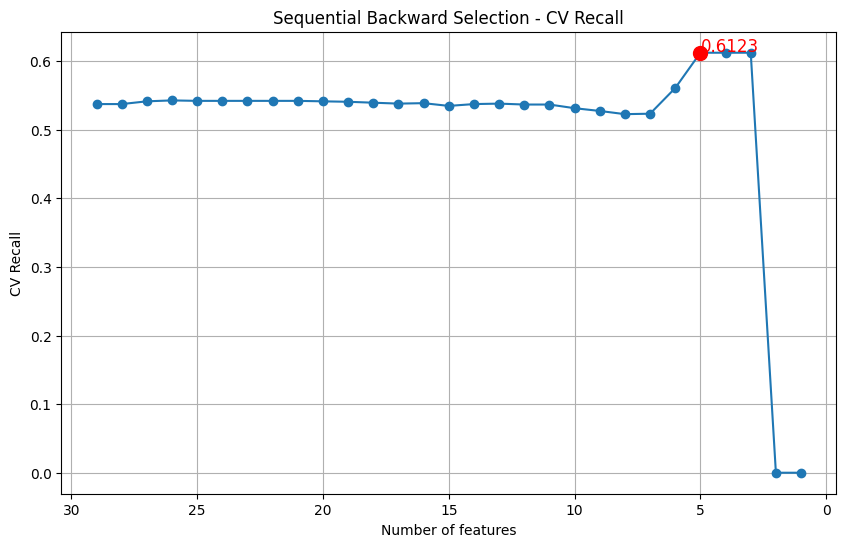

In [ ]:
print(len(selected_features), "features selected:", selected_features, "\n")
plot_sbs_scores(df_results)

In [ ]:
from sklearn.metrics import classification_report
print("Report for training:\n", classification_report(y_train, modelLR.predict(X_train[selected_features])))
print("Report for test:\n", classification_report(y_test, modelLR.predict(X_test[selected_features])))

Report for training:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4138
           1       0.54      0.61      0.57      1496

    accuracy                           0.76      5634
   macro avg       0.70      0.71      0.70      5634
weighted avg       0.77      0.76      0.76      5634

Report for test:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



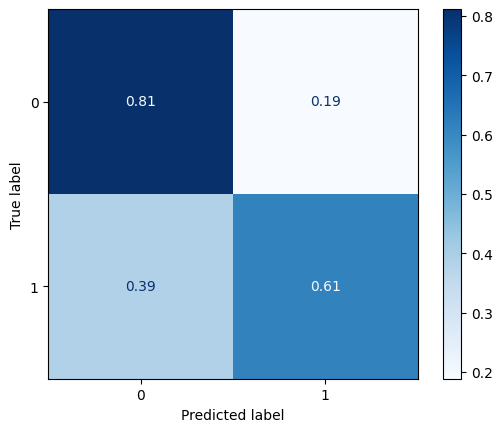

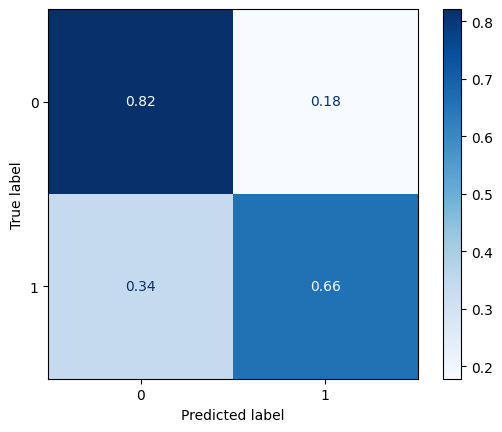

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelLR, X_train[selected_features], y_train, cmap='Blues', normalize='true')
ConfusionMatrixDisplay.from_estimator(modelLR, X_test[selected_features], y_test, cmap='Blues', normalize='true')

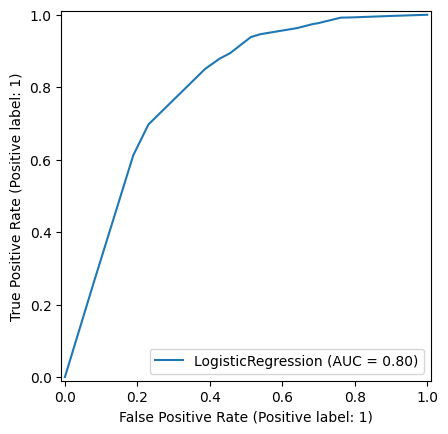

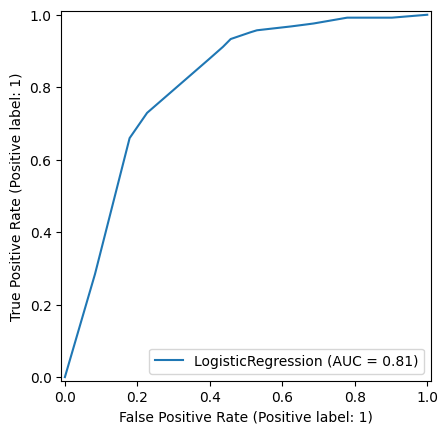

In [ ]:
RocCurveDisplay.from_estimator(modelLR, X_train[selected_features], y_train)
RocCurveDisplay.from_estimator(modelLR, X_test[selected_features], y_test)

# Train RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
import numpy as np

def train_random_forest(X_train, y_train, X_test, y_test, random_state=42):
    """
    Entrena un RandomForestClassifier con GridSearchCV y calcula recall.
    Retorna el mejor modelo y sus métricas.
    """

    # Definir espacio de hiperparámetros
    param_grid = {
        "n_estimators": [10, 20, 50],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    }

    rf = RandomForestClassifier(class_weight="balanced", n_jobs=-1, random_state=random_state)

    grid = GridSearchCV(
        rf,
        param_grid,
        scoring="recall",
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    # Predicciones
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Métricas
    train_rec = recall_score(y_train, y_train_pred)
    test_rec  = recall_score(y_test, y_test_pred)

    return best_model, train_rec, test_rec, grid


In [ ]:
modelRF, train_rec, test_rec, gridRF = train_random_forest(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
print(f"Train recall: {train_rec:.3f}, Test recall: {test_rec:.3f}")
print(gridRF.best_params_)

Train recall: 0.809, Test recall: 0.845
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
print("Report for training:", classification_report(y_train, modelRF.predict(X_train)))
print("Report for test:", classification_report(y_test, modelRF.predict(X_test)))

Report for training:               precision    recall  f1-score   support

           0       0.91      0.74      0.82      4138
           1       0.53      0.81      0.64      1496

    accuracy                           0.76      5634
   macro avg       0.72      0.77      0.73      5634
weighted avg       0.81      0.76      0.77      5634

Report for test:               precision    recall  f1-score   support

           0       0.93      0.74      0.82      1036
           1       0.54      0.84      0.66       373

    accuracy                           0.77      1409
   macro avg       0.74      0.79      0.74      1409
weighted avg       0.83      0.77      0.78      1409



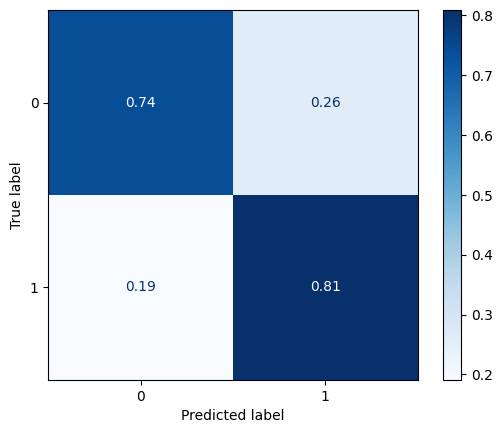

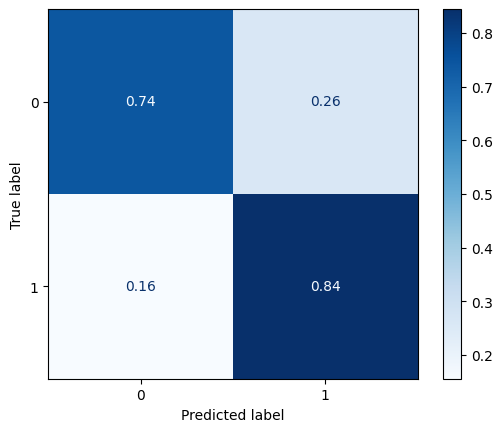

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelRF, X_train, y_train, cmap='Blues', normalize='true')
ConfusionMatrixDisplay.from_estimator(modelRF, X_test, y_test, cmap='Blues', normalize='true')

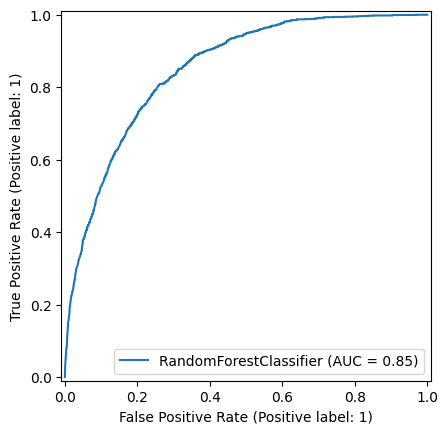

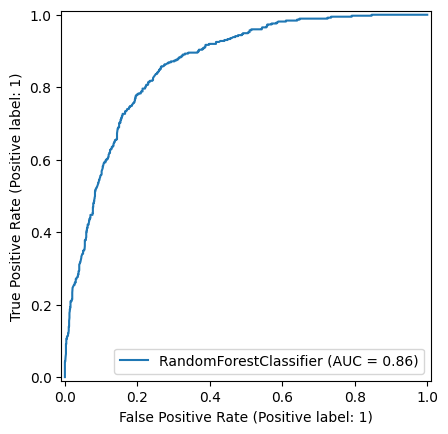

In [ ]:
RocCurveDisplay.from_estimator(modelRF, X_train, y_train)
RocCurveDisplay.from_estimator(modelRF, X_test, y_test)

# Train XGBoost

In [22]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from tqdm.auto import tqdm
import numpy as np

class TQDMGridSearch(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        # total combinations
        self._param_combos = list(ParameterGrid(self.param_grid))
        self._pbar = tqdm(total=len(self._param_combos), desc="GridSearch")

        # wrap the parent fit
        return super().fit(X, y, **fit_params)

    def _run_search(self, evaluate_candidates):
        """Override to include tqdm bar"""
        for params in self._param_combos:
            evaluate_candidates([params])
            self._pbar.update(1)

        self._pbar.close()

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

def train_xgboost_with_tqdm(X_train, y_train, X_test, y_test,
                            n_estimators=None, learning_rate=None,
                            max_depth=None, random_state=42,
                            param_grid=None, cv=4, scoring='recall'):
  """
  Train an XGBClassifier using GridSearchCV (preserving original function name).
  Focuses on minority class recall for imbalanced data.
  """
  if param_grid is None:
    param_grid = {
    'n_estimators': [n_estimators or 100, 300, 500],
    'learning_rate': [learning_rate or 0.1, 0.05, 0.2],
    'max_depth': [max_depth or 3, 4, 5]
    }

  scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

  model = XGBClassifier(
      random_state=random_state,
      eval_metric='logloss',
      scale_pos_weight=scale_pos_weight
  )

  grid = TQDMGridSearch(
      estimator=model,
      param_grid=param_grid,
      scoring=scoring,
      cv=cv,
      verbose=1,
      n_jobs=-1
  )

  grid.fit(X_train, y_train)
  best_model = grid.best_estimator_

  # Predict with custom threshold
  y_train_pred = best_model.predict(X_train)
  y_test_pred = best_model.predict(X_test)

  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)

  return best_model, train_recall, test_recall, grid

In [10]:
modelXGB, train_recall, test_recall, gridxgb = train_xgboost_with_tqdm(X_train, y_train, X_test, y_test, param_grid={
    "n_estimators": [2, 4, 5, 10],
    "learning_rate": [0.0001, 0.0002, 0.001, 0.02, 0.03],
    "max_depth": [3, 5],
    "min_child_weight": [1, 3, 5],
    "gamma": [0.0001, 0.001, 0.01],
}
)
print(f"Train recall: {train_recall:.3f}, Test recall: {test_recall:.3f}")

GridSearch:   0%|          | 0/360 [00:00<?, ?it/s]

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

In [ ]:
print("Report for training:", classification_report(y_train, modelXGB.predict(X_train)))
print("Report for test:", classification_report(y_test, modelXGB.predict(X_test)))

In [ ]:
gridxgb.best_params_

{'gamma': 0.0001,
 'learning_rate': 0.001,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 4}

In [ ]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modelXGB.feature_importances_
}).sort_values('importance', ascending=False)

display(feature_importances)

,feature,importance
10,Contract_Two year,0.502616
9,Contract_One year,0.307087
13,InternetService_Fiber optic,0.117663
25,StreamingMovies_Yes,0.052392
2,MonthlyCharges,0.012427
1,tenure,0.007816
5,PaperlessBilling,0.000000
4,Dependents,0.000000
3,TotalCharges,0.000000
6,Partner,0.000000


In [26]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mejores hiperparámetros proporcionados por el usuario
best_xgboost_params = {
    'gamma': 0.0001,
    'learning_rate': 0.001,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 4,
    'random_state': 42
}

# Calcular scale_pos_weight para manejar el desbalance de clases (como se hizo antes)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Instanciar y entrenar el modelo XGBoost con los mejores hiperparámetros
final_modelXGB = XGBClassifier(
    **best_xgboost_params,
    eval_metric='logloss', # Asegurar que se usa una métrica de evaluación adecuada
    scale_pos_weight=scale_pos_weight
)

print("Entrenando XGBoost con los mejores hiperparámetros...")
final_modelXGB.fit(X_train, y_train)

print("\n--- Reporte de Clasificación (Conjunto de Entrenamiento) ---")
print(classification_report(y_train, final_modelXGB.predict(X_train)))

print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
print(classification_report(y_test, final_modelXGB.predict(X_test)))


Entrenando XGBoost con los mejores hiperparámetros...

--- Reporte de Clasificación (Conjunto de Entrenamiento) ---
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      4138
           1       0.43      0.88      0.57      1496

    accuracy                           0.65      5634
   macro avg       0.68      0.73      0.64      5634
weighted avg       0.80      0.65      0.67      5634


--- Reporte de Clasificación (Conjunto de Prueba) ---
              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409



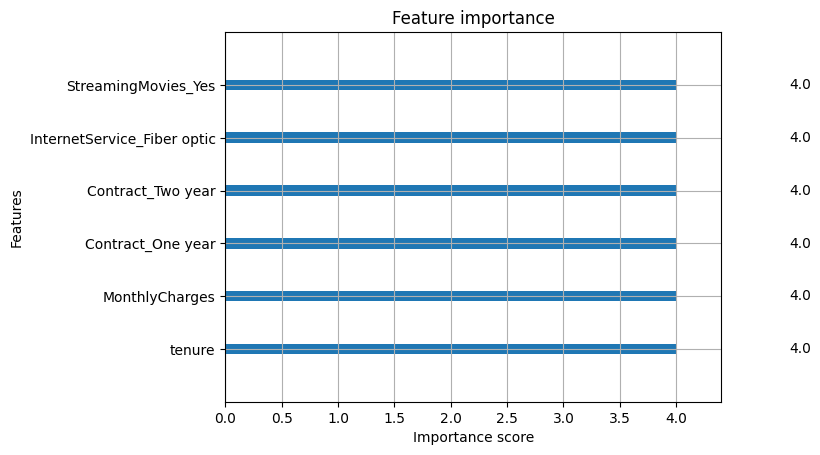

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(final_modelXGB, max_num_features=10, importance_type='weight')
plt.show()


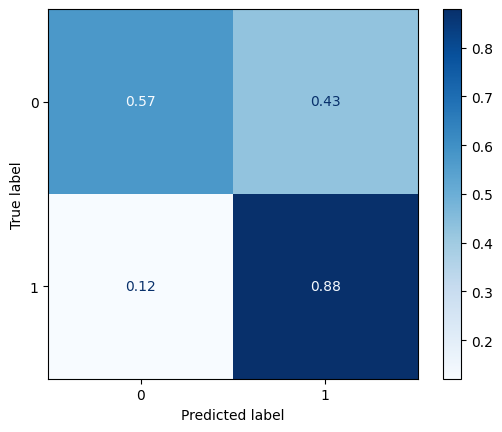

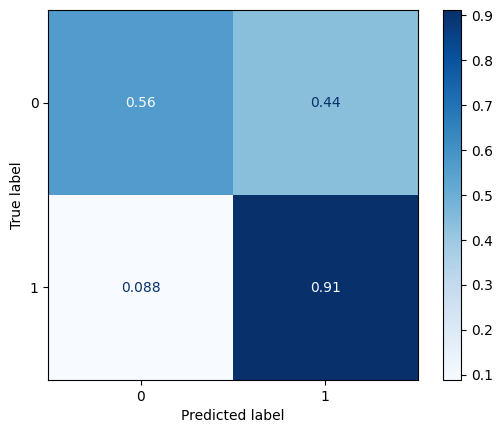

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(final_modelXGB, X_train, y_train, cmap='Blues', normalize='true')
ConfusionMatrixDisplay.from_estimator(final_modelXGB, X_test, y_test, cmap='Blues', normalize='true')


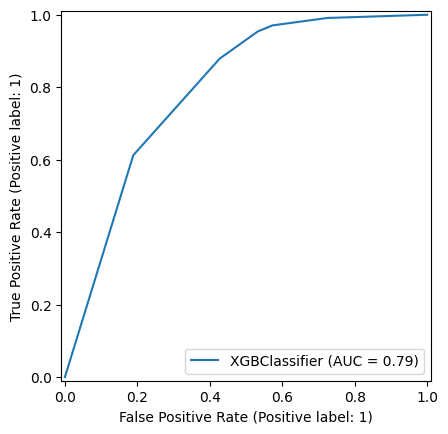

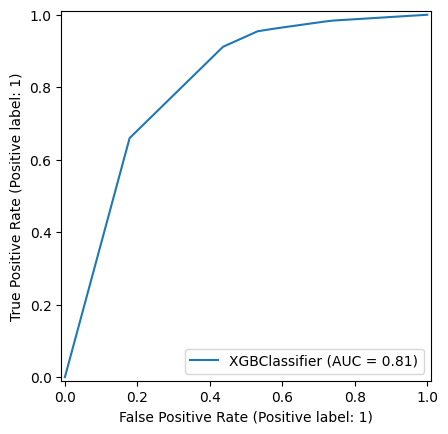

In [29]:
RocCurveDisplay.from_estimator(final_modelXGB, X_train, y_train)
RocCurveDisplay.from_estimator(final_modelXGB, X_test, y_test)

# Train SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
import numpy as np

def train_svm_classifier(X_train, y_train, X_test, y_test, random_state=42):
    """
    Entrena un SVM (SVC) con GridSearchCV usando recall.
    Retorna el mejor modelo, recall en train/test y el grid.
    """

    # Espacio de búsqueda de hiperparámetros
    param_grid = {
        "kernel": ["rbf", "poly", "sigmoid"],
        "C": [0.1, 1, 5, 10],
        "gamma": ["scale", "auto"],
        "degree": [2, 3, 4]  # solo aplica para poly
    }

    svm = SVC(class_weight="balanced", probability=False, random_state=random_state)

    grid = GridSearchCV(
        svm,
        param_grid,
        scoring="recall",   # misma métrica que tu RF
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Predicciones en numpy
    y_train_pred = best_model.predict(X_train).astype(np.int32)
    y_test_pred  = best_model.predict(X_test ).astype(np.int32)

    # Métricas
    train_rec = recall_score(y_train, y_train_pred)
    test_rec  = recall_score(y_test, y_test_pred)

    return best_model, train_rec, test_rec, grid


In [ ]:
modelSVM, train_rec, test_rec, gridSVM = train_svm_classifier(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
print(f"Train recall: {train_rec:.3f}, Test recall: {test_rec:.3f}")
print(gridSVM.best_params_)

Train recall: 0.901, Test recall: 0.909
{'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Mejores hiperparámetros proporcionados por el usuario para SVM
best_svm_params = {
    'C': 0.1,
    'degree': 4,
    'gamma': 'auto',
    'kernel': 'poly',
    'random_state': 42,
    'probability': False # 'probability' needs to be False for predict to work directly without issues if not fitted with it.
}

# Instanciar y entrenar el modelo SVM con los mejores hiperparámetros
# Aseguramos class_weight='balanced' para manejar el desbalance de clases
final_modelSVM = SVC(
    **best_svm_params,
    class_weight='balanced'
)

print("Entrenando SVM con los mejores hiperparámetros...")
final_modelSVM.fit(X_train, y_train)

Entrenando SVM con los mejores hiperparámetros...


SVC(C=0.1, class_weight='balanced', degree=4, gamma='auto', kernel='poly',
    random_state=42)

In [32]:
print("Report for training:", classification_report(y_train, final_modelSVM.predict(X_train)))
print("Report for test:", classification_report(y_test, final_modelSVM.predict(X_test)))

Report for training:               precision    recall  f1-score   support

           0       0.92      0.42      0.57      4138
           1       0.36      0.90      0.51      1496

    accuracy                           0.55      5634
   macro avg       0.64      0.66      0.54      5634
weighted avg       0.77      0.55      0.56      5634

Report for test:               precision    recall  f1-score   support

           0       0.93      0.42      0.58      1036
           1       0.36      0.91      0.52       373

    accuracy                           0.55      1409
   macro avg       0.64      0.67      0.55      1409
weighted avg       0.78      0.55      0.56      1409



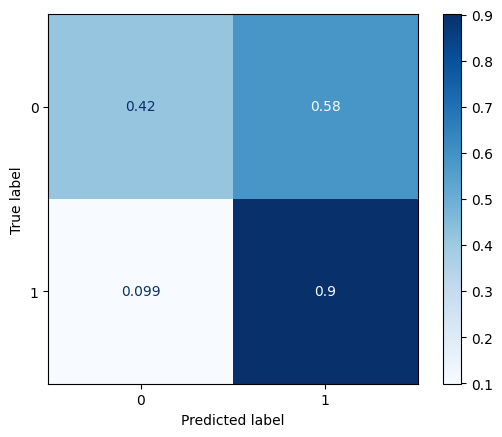

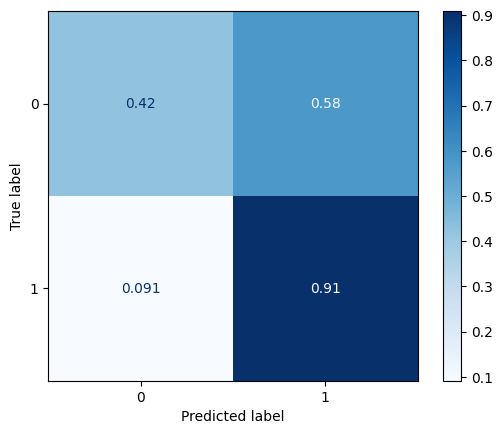

In [33]:
ConfusionMatrixDisplay.from_estimator(final_modelSVM, X_train, y_train, cmap='Blues', normalize='true')
ConfusionMatrixDisplay.from_estimator(final_modelSVM, X_test, y_test, cmap='Blues', normalize='true')

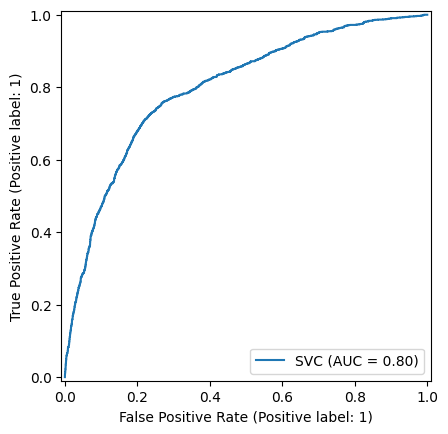

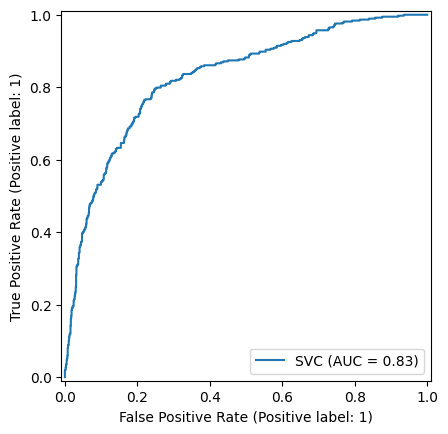

In [34]:
RocCurveDisplay.from_estimator(final_modelSVM, X_train, y_train)
RocCurveDisplay.from_estimator(final_modelSVM, X_test, y_test)

# Train NN

In [13]:
def train_nn_with_tqdm_gs(X, y, device="cpu"):
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import numpy as np
    from sklearn.base import BaseEstimator
    from sklearn.metrics import recall_score

    # -----------------
    # Param grid
    # -----------------
    param_grid = {
        "hidden_sizes": [(64, 32), (32, 16), (128, 64, 32)],
        "lr": [0.0005, 0.0001],
        "epochs": [50, 100],
        "batch_size": [32, 64, 128],
    }

    # -----------------
    # Train/Val split
    # -----------------
    n = len(X)
    cut = int(n * 0.8)

    X_train = np.asarray(X[:cut], dtype=np.float32)
    y_train = np.asarray(y[:cut], dtype=np.float32)

    X_val = np.asarray(X[cut:], dtype=np.float32)
    y_val = np.asarray(y[cut:], dtype=np.float32)

    # -----------------------
    # INTERNAL ESTIMATOR
    # (scikit-learn compatible)
    # -----------------------
    class TorchEstimator(BaseEstimator):
        def __init__(self, hidden_sizes=(32,16), lr=0.001, epochs=30, batch_size=32):
            self.hidden_sizes = hidden_sizes
            self.lr = lr
            self.epochs = epochs
            self.batch_size = batch_size
            self.model_ = None

        def fit(self, Xf, yf):
            Xf = torch.tensor(Xf, dtype=torch.float32).to(device)
            yf = torch.tensor(yf, dtype=torch.float32).unsqueeze(1).to(device)

            layers = []
            inp = Xf.shape[1]
            for h in self.hidden_sizes:
                layers.append(nn.Linear(inp, h))
                layers.append(nn.ReLU())
                inp = h
            layers.append(nn.Linear(inp, 1))

            self.model_ = nn.Sequential(*layers).to(device)

            # class weight
            pos = yf.sum()
            neg = len(yf) - pos
            pos_weight = torch.tensor(neg / pos, dtype=torch.float32).to(device)

            loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
            opt = optim.Adam(self.model_.parameters(), lr=self.lr)

            loader = torch.utils.data.DataLoader(
                torch.utils.data.TensorDataset(Xf, yf),
                batch_size=self.batch_size,
                shuffle=True
            )

            for _ in range(self.epochs):
                self.model_.train()
                for xb, yb in loader:
                    opt.zero_grad()
                    out = self.model_(xb)
                    loss = loss_fn(out, yb)
                    loss.backward()
                    opt.step()

            return self

        def predict(self, Xp):
            Xp = torch.tensor(Xp, dtype=torch.float32).to(device)
            self.model_.eval()
            with torch.no_grad():
                out = torch.sigmoid(self.model_(Xp)).cpu().numpy()
            return (out >= 0.5).astype(int)

    # -----------------------
    # Run TQDM Grid Search
    # -----------------------
    gs = TQDMGridSearch(
        estimator=TorchEstimator(),
        param_grid=param_grid,
        scoring="recall",
        cv=2
    )

    gs.fit(X_train, y_train)

    # best estimator
    best_model = gs.best_estimator_

    # eval on val
    preds = best_model.predict(X_val)
    train_score = recall_score(y_train, best_model.predict(X_train))
    test_score = recall_score(y_val, preds)

    return best_model, gs, train_score, test_score


In [ ]:
modelNN, gridnn, train_rec, test_rec = train_nn_with_tqdm_gs(X_train, y_train, device='cpu')

GridSearch:   0%|          | 0/36 [00:00<?, ?it/s]

/tmp/ipython-input-1673752281.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_weight = torch.tensor(neg / pos, dtype=torch.float32).to(device)
/tmp/ipython-input-1673752281.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_weight = torch.tensor(neg / pos, dtype=torch.float32).to(device)
/tmp/ipython-input-1673752281.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_weight = torch.tensor(neg / pos, dtype=torch.float32).to(device)
/tmp/ipython-input-1673752281.py:60: UserWarning: To copy construct from a tensor, it is

In [ ]:
print(f"Best params: {gridnn.best_params_}", "Train recall:", train_rec, "Test recall:", test_rec)

In [ ]:
# model, train_acc, test_acc = train_nn_with_tqdm(X_train, y_train, X_test, y_test, device='cuda')
# print(f"Train accuracy: {train_acc:.3f}, Test accuracy: {test_acc:.3f}")

Report for training:               precision    recall  f1-score   support

           0       0.90      0.75      0.82      4138
           1       0.53      0.78      0.63      1496

    accuracy                           0.76      5634
   macro avg       0.72      0.76      0.73      5634
weighted avg       0.80      0.76      0.77      5634

Report for test:               precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.79      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



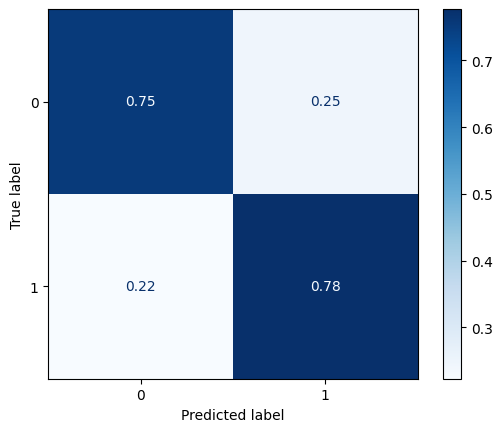

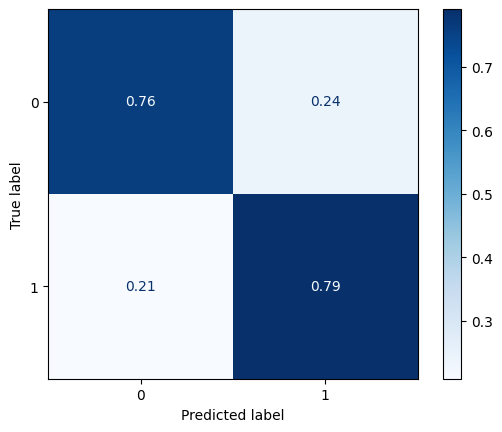

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


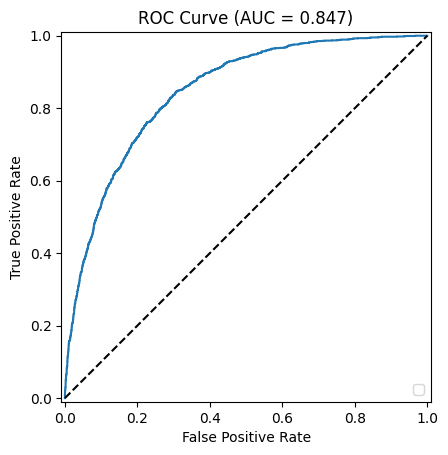

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


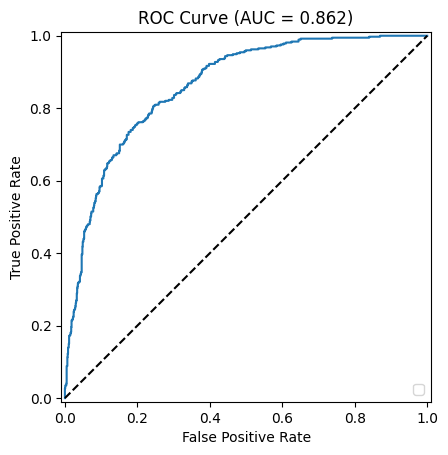

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Detect device of trained model
device = next(modelNN.model_.parameters()).device

# Ensure numeric
X_train_numeric = X_train.astype('float32')
X_test_numeric = X_test.astype('float32')

# Convert to tensor ON THE SAME DEVICE
X_train_t = torch.tensor(X_train_numeric.values, dtype=torch.float32).to(device)
X_test_t = torch.tensor(X_test_numeric.values, dtype=torch.float32).to(device)

# Predictions
modelNN.model_.eval()
with torch.no_grad():
    logits_train = modelNN.model_(X_train_t)
    probs_train  = torch.sigmoid(logits_train).cpu().numpy()
    logits_test = modelNN.model_(X_test_t)
    probs_test  = torch.sigmoid(logits_test).cpu().numpy()
    y_train_pred = (probs_train >= 0.5).astype(int)
    y_test_pred = (probs_test >= 0.5).astype(int)

print("Report for training:", classification_report(y_train, y_train_pred))
print("Report for test:", classification_report(y_test, y_test_pred))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred, normalize='true')
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
ConfusionMatrixDisplay(cm_train).plot(cmap='Blues')
ConfusionMatrixDisplay(cm_test).plot(cmap='Blues')
plt.show()

# ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
roc_auc_train = roc_auc_score(y_train, probs_train)
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train).plot()
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title(f'ROC Curve (AUC = {roc_auc_train:.3f})')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probs_test)
roc_auc = roc_auc_score(y_test, probs_test)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title(f'ROC Curve (AUC = {roc_auc:.3f})')
plt.show()

# PCA Y UMAP

=== MI aggregated (top 20) ===


,0
Contract,0.104242
tenure,0.073067
TechSupport,0.061778
OnlineSecurity,0.054143
InternetService,0.050745
MonthlyCharges,0.047143
TotalCharges,0.044764
PaymentMethod,0.042903
OnlineBackup,0.037113
DeviceProtection,0.036355


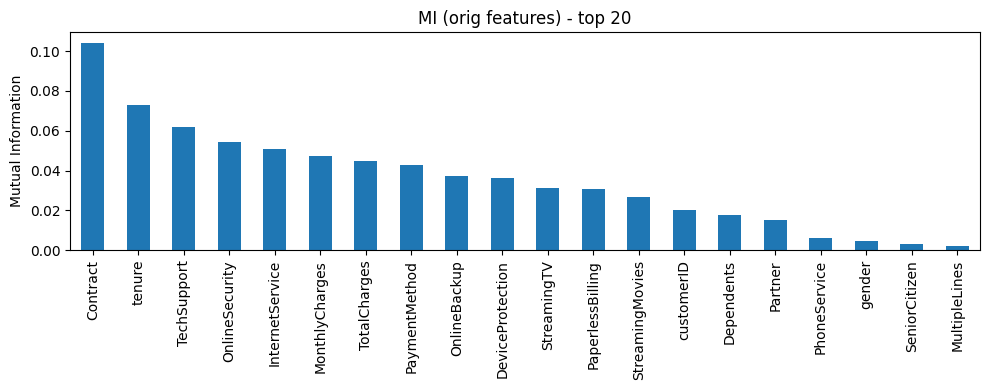

=== Pearson (numeric features) ===


,0
tenure,-0.352229
TotalCharges,-0.198324
MonthlyCharges,0.193356


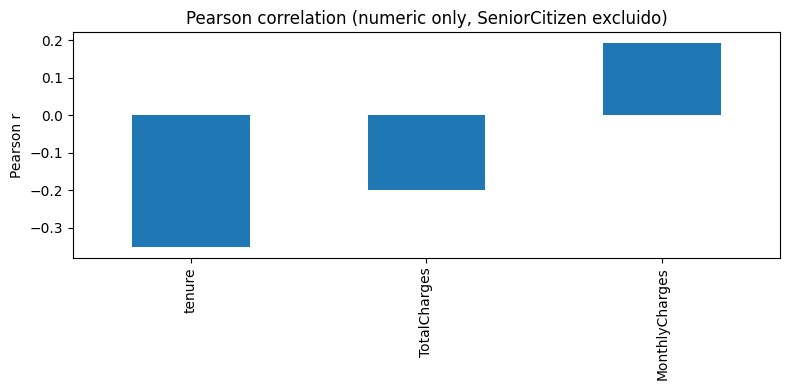

Candidatos (según MI < 0.005 o |Pearson| < 0.1):
['gender', 'SeniorCitizen', 'MultipleLines']


In [35]:
# === : MI (OHE) + Pearson + gráficos simples ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Requerimientos
if 'df' not in globals():
    raise RuntimeError("No encuentro 'df' en el notebook.")
if 'X_train' not in globals() or 'y_train' not in globals():
    raise RuntimeError("No encuentro X_train y/o y_train.")

df_original = df.copy()
target_col = 'Churn'

# --- 1) One-hot encoding ---
df_feats = df_original.drop(columns=[target_col], errors='ignore')
df_ohe = pd.get_dummies(df_feats, drop_first=False).fillna(0)

# --- 2) Target ---
y_full = LabelEncoder().fit_transform(df_original[target_col].astype(str))

# --- 3) MI en columnas OHE ---
mi_vals = mutual_info_classif(df_ohe.values, y_full, discrete_features='auto', random_state=42)
mi_ohe = pd.Series(mi_vals, index=df_ohe.columns).sort_values(ascending=False)

# --- 4) Agrupar MI por feature original ---
orig_feats = df_feats.columns.tolist()
group_map = {}

for ohe_col in df_ohe.columns:
    matched = None
    for orig in orig_feats:
        if ohe_col == orig or ohe_col.startswith(orig + "_"):
            matched = orig
            break
    if matched is None:
        matched = ohe_col.split('_')[0]
    group_map.setdefault(matched, []).append(ohe_col)

mi_agg = {orig: float(mi_ohe.loc[members].max()) for orig, members in group_map.items()}
mi_series = pd.Series(mi_agg).sort_values(ascending=False)

# --- 5) Pearson: corregimos SeniorCitizen ---
num_cols = [c for c in df_original.columns if pd.api.types.is_numeric_dtype(df_original[c]) and c != target_col]

# Excluir SeniorCitizen por ser variable binaria categórica
if "SeniorCitizen" in num_cols:
    num_cols.remove("SeniorCitizen")

pearson = {}
y_enc = y_full

for c in num_cols:
    tmp = df_original[[c]].join(pd.Series(y_enc, index=df_original.index, name='target')).dropna()
    if tmp.shape[0] > 2:
        try:
            corr = np.corrcoef(tmp[c].astype(float), tmp['target'].astype(float))[0,1]
        except:
            corr = np.nan
    else:
        corr = np.nan
    pearson[c] = corr

pearson_ser = pd.Series(pearson).sort_values(key=lambda s: s.abs(), ascending=False)

# --- 6) Gráficas ---
print("=== MI aggregated (top 20) ===")
display(mi_series.head(20))
mi_series.head(20).plot(kind='bar', figsize=(10,4))
plt.ylabel("Mutual Information")
plt.title("MI (orig features) - top 20")
plt.tight_layout()
plt.show()

print("=== Pearson (numeric features) ===")
display(pearson_ser)
pearson_ser.plot(kind='bar', figsize=(8,4))
plt.title("Pearson correlation (numeric only, SeniorCitizen excluido)")
plt.ylabel("Pearson r")
plt.tight_layout()
plt.show()

# --- 7) Candidatos ---
mi_threshold = 0.005
pearson_threshold = 0.10

candidates = []
for feat, val in mi_series.items():
    if val < mi_threshold:
        candidates.append(feat)

for feat, val in pearson_ser.items():
    if pd.notna(val) and abs(val) < pearson_threshold and feat not in candidates:
        candidates.append(feat)

print(f"Candidatos (según MI < {mi_threshold} o |Pearson| < {pearson_threshold}):")
print(candidates)

# --- Guardar ---
mi_series.to_csv("mi_per_feature_orig_minimal.csv")
pearson_ser.to_csv("pearson_numeric_minimal.csv")


In [36]:
# -------------------------
# 5.2 PCA + evaluación de modelos (XGBoost + SVM)
# -------------------------
print("\n-- 5.2 PCA y evaluación (XGBoost + SVM) --")

# Imports requeridos
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Validar modelos entrenados
if 'final_modelXGB' not in globals() or 'final_modelSVM' not in globals():
    raise RuntimeError("final_modelXGB o final_modelSVM no están definidos. Ejecuta las celdas de entrenamiento.")

models = {
    "XGBoost": final_modelXGB,
    "SVM": final_modelSVM
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# evaluación en espacio original (X_train)
X_for_analysis = X_train.copy()
y_for_analysis = y_train.copy()

base_results = {}
for name, model in models.items():
    try:
        scores = cross_val_score(model,
                                 X_for_analysis,
                                 y_for_analysis,
                                 cv=cv,
                                 scoring="recall",
                                 n_jobs=-1)
        base_results[name] = {
            "mean_recall": float(np.mean(scores)),
            "std": float(np.std(scores))
        }
    except Exception as e:
        print(f"Error evaluando {name} en espacio original: {e}")
        base_results[name] = {"mean_recall": np.nan, "std": np.nan}

    print(f"{name} (base): mean Recall = {base_results[name]['mean_recall']:.4f} ± {base_results[name]['std']:.4f}")


# -------------------------
# PCA (95% varianza explicada)
# -------------------------
pca_full = PCA()
pca_full.fit(X_for_analysis)
explained = np.cumsum(pca_full.explained_variance_ratio_)

def choose_n_by_variance(threshold=0.95):
    idx = np.searchsorted(explained, threshold) + 1
    return min(idx, X_for_analysis.shape[1]-1)

n_pca = choose_n_by_variance(0.95)

print(f"PCA -> n_components = {n_pca} (95% varianza acumulada). "
      f"Reducción% = {100*(1 - n_pca / X_for_analysis.shape[1]):.1f}%")

pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_for_analysis)


# -------------------------
# Evaluación con PCA
# -------------------------
pca_results = {}
for name, model in models.items():
    scores = cross_val_score(model,
                             X_pca,
                             y_for_analysis,
                             cv=cv,
                             scoring="recall",
                             n_jobs=-1)
    pca_results[name] = {
        "mean_recall": float(np.mean(scores)),
        "std": float(np.std(scores))
    }

    print(f"{name} (PCA): mean Recall = {pca_results[name]['mean_recall']:.4f} ± {pca_results[name]['std']:.4f}")


# -------------------------
# Tabla de resultados PCA
# -------------------------
pca_table = pd.DataFrame([
    {
        "model": name,
        "mean_recall": v["mean_recall"],
        "std_recall": v["std"],
        "n_components": n_pca,
        "reduction_pct": 100*(1 - n_pca/X_for_analysis.shape[1])
    }
    for name, v in pca_results.items()
])

display(pca_table)
pca_table.to_csv("pca_results.csv", index=False)
print("Guardado: pca_results.csv (Recall).")



-- 5.2 PCA y evaluación (XGBoost + SVM) --
XGBoost (base): mean Recall = 0.8257 ± 0.1029
SVM (base): mean Recall = 0.9017 ± 0.0135
PCA -> n_components = 17 (95% varianza acumulada). Reducción% = 43.3%
XGBoost (PCA): mean Recall = 0.8203 ± 0.0564
SVM (PCA): mean Recall = 0.9098 ± 0.0163


,model,mean_recall,std_recall,n_components,reduction_pct
0,XGBoost,0.820256,0.056386,17,43.333333
1,SVM,0.909750,0.016290,17,43.333333


Guardado: pca_results.csv (Recall).


In [37]:
!pip uninstall -y torch torchvision torchaudio torchtext
!pip uninstall -y nvidia-cublas-cu12 nvidia-cuda-nvrtc-cu12 nvidia-cufft-cu12 \
                 nvidia-curand-cu12 nvidia-cusolver-cu12 nvidia-cusparse-cu12 \
                 nvidia-nvjitlink-cu12
!pip install -q --extra-index-url=https://pypi.nvidia.com cuml-cu12

from cuml.manifold import UMAP as UMAP_GPU


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Found existing installation: nvidia-cublas-cu12 12.6.4.1
Uninstalling nvidia-cublas-cu12-12.6.4.1:
  Successfully uninstalled nvidia-cublas-cu12-12.6.4.1
Found existing installation: nvidia-cuda-nvrtc-cu12 12.6.77
Uninstalling nvidia-cuda-nvrtc-cu12-12.6.77:
  Successfully uninstalled nvidia-cuda-nvrtc-cu12-12.6.77
Found existing installation: nvidia-cufft-cu12 11.3.0.4
Uninstalling nvidia-cufft-cu12-11.3.0.4:
  Successfully uninstalled nvidia-cufft-cu12-11.3.0.4
Found existing installation: nvidia-curand-cu12 10.3.7.77
Uninstalling nvidia-curand-cu12-10.3.7.77:
  Successfully uninstal

In [41]:
# ===============================================================
# 5.3 UMAP GPU – Versión final optimizada para clasificación
# ===============================================================

from cuml.manifold import UMAP as UMAP_GPU
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tqdm.auto import tqdm
import time

print("✓ Ejecutando UMAP GPU optimizado (sin PCA)…")

# ----------------------------------------------------------------
# CONFIGURACIÓN
# ----------------------------------------------------------------
umap_dims = [3, 5, 10, 15]       # Dimensiones recomendadas
n_neighbors = 50                 # Más información global → mejor SVM
min_dist = 0.1                   # Separación suave entre clusters
n_epochs = 500                   # Más convergencia


build_algo = "nn_descent"        # Rápido y 100% compatible cuML (NO ivfflat)

sample_frac = 1.0                # Usar TODO el dataset
cv_folds = 5

# ----------------------------------------------------------------
# MUESTRA
# ----------------------------------------------------------------
n_sample = int(len(X_train) * sample_frac)
idx = np.random.choice(len(X_train), n_sample, replace=False)

X_s = X_train.iloc[idx].values      # Arrays → más rápido para cuML
y_s = np.array(y_train)[idx]

print(f"Usando {n_sample} filas ({sample_frac*100:.0f}%).\n")

# ----------------------------------------------------------------
# VALIDACIÓN
# ----------------------------------------------------------------
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

results = []

print("Ejecutando UMAP GPU…\n")

# ----------------------------------------------------------------
# LOOP UMAP
# ----------------------------------------------------------------
for d in tqdm(umap_dims):

    reducer = UMAP_GPU(
        n_components=d,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_epochs=n_epochs,
        init="spectral",
        random_state=None,          # Mantener para activar GPU
        build_algo=build_algo       # ← AQUÍ USAMOS nn_descent
    )

    t0 = time.time()

    # ---- Reducir dimensionalidad con UMAP GPU ----
    X_um = reducer.fit_transform(X_s)

    row = {"n_components": d}

    # ---- Evaluación Recall (XGBoost y SVM) ----
    for name, model in {
        "XGBoost": final_modelXGB,
        "SVM": final_modelSVM
    }.items():

        scores = cross_val_score(
            model, X_um, y_s,
            cv=cv, scoring="recall", n_jobs=-1
        )

        row[f"{name}_mean_recall"] = float(scores.mean())
        row[f"{name}_std"] = float(scores.std())

    row["time_s"] = time.time() - t0
    results.append(row)

# ----------------------------------------------------------------
# RESULTADOS
# ----------------------------------------------------------------
umap_df = pd.DataFrame(results)

print("\nResultados finales UMAP GPU (optimizado):")
display(umap_df)

umap_df.to_csv("umap_results_gpu_optimized.csv", index=False)
print("\nGuardado: umap_results_gpu_optimized.csv")


✓ Ejecutando UMAP GPU optimizado (sin PCA)…
Usando 5634 filas (100%).

Ejecutando UMAP GPU…



  0%|          | 0/4 [00:00<?, ?it/s]


Resultados finales UMAP GPU (optimizado):


,n_components,XGBoost_mean_recall,XGBoost_std,SVM_mean_recall,SVM_std,time_s
0,3,0.626299,0.042450,0.736620,0.021111,990.453721
1,5,0.818207,0.038949,0.760682,0.014323,74.134644
2,10,0.749300,0.084288,0.810829,0.024807,13.901047
3,15,0.619001,0.084710,0.812165,0.021824,7.213583



Guardado: umap_results_gpu_optimized.csv


In [ ]:
# ===============================================================
# Gráfico UMAP 3D (Plotly interactivo)
# ===============================================================

from cuml.manifold import UMAP as UMAP_GPU
import numpy as np
import pandas as pd
import plotly.express as px

print("✓ Generando embedding UMAP 3D para visualización…")

# Parámetros del mejor modelo visual
d = 3
n_neighbors = 50
min_dist = 0.1
n_epochs = 500

# Usamos TODO el dataset (X_s y y_s)
X_array = X_train.values
y_array = np.array(y_train)

# Reducir a 3 dimensiones con UMAP GPU
reducer_3d = UMAP_GPU(
    n_components=3,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_epochs=n_epochs,
    init="spectral",
    random_state=42,
    build_algo="nn_descent"
)

X_um_3d = reducer_3d.fit_transform(X_array)

print("✓ UMAP 3D generado.")

# Construir DataFrame para graficar
df_umap3d = pd.DataFrame({
    "UMAP1": X_um_3d[:,0],
    "UMAP2": X_um_3d[:,1],
    "UMAP3": X_um_3d[:,2],
    "Churn": y_array.astype(int)
})

# Gráfico interactivo 3D (Plotly)
fig = px.scatter_3d(
    df_umap3d,
    x="UMAP1", y="UMAP2", z="UMAP3",
    color="Churn",
    title="UMAP en 3 dimensiones (GPU)",
    opacity=0.7
)

fig.show()


In [ ]:
# Requiere: X_um_3d (n x 3 embedding) o recalcular UMAP 3D si no existe.
# También requiere X_train (DataFrame) y df original con columnas como 'tenure', 'MonthlyCharges', 'Contract'.

import numpy as np
import pandas as pd
import plotly.express as px

# Opción A: si ya tienes X_um_3d en memoria (embedding 3D)
# X_um_3d = ...  # numpy array shape (n,3)

# Opción B: recalcular (si no tienes X_um_3d). Usa tu UMAP GPU o cuML
# from cuml.manifold import UMAP as UMAP_GPU
# reducer = UMAP_GPU(n_components=3, n_neighbors=50, min_dist=0.1, n_epochs=500,
#                    init="spectral", random_state=42, build_algo="nn_descent")
# X_um_3d = reducer.fit_transform(X_train.values)   # demora según tamaño

# Usar X_um_3d aquí:
df_vis = pd.DataFrame({
    "UMAP1": X_um_3d[:,0],
    "UMAP2": X_um_3d[:,1],
    "UMAP3": X_um_3d[:,2],
    "Churn": np.array(y_train).astype(int)   # o y_s si usaste muestra
})

# Añade columnas útiles del df original para hover (asegúrate de que índices correspondan)
# por ejemplo, si df_original tiene las columnas:
cols_to_add = ['tenure','MonthlyCharges','TotalCharges','Contract']  # ajusta nombres reales
for c in cols_to_add:
    if c in df.columns:
        df_vis[c] = df[c].iloc[df_vis.index].values   # o usa X_train.index si es distinto

# Gráfico interactivo 3D con hover
fig = px.scatter_3d(df_vis,
                    x='UMAP1', y='UMAP2', z='UMAP3',
                    color='Churn',
                    hover_data=cols_to_add,   # muestra esas variables en tooltip
                    title='UMAP 3D (coloreado por Churn, hover con variables clave)',
                    opacity=0.8,
                    width=900, height=600)
fig.update_traces(marker=dict(size=3))
fig.show()
